In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [17]:
np.random.seed(42)

M = 100

x = np.sort(np.random.uniform(-3,3, size=(M, 1)), axis=0)
n = np.random.normal(loc=0.0, scale=1, size=(M, 1))

y = 2 + x + 0.5*x**2
y_noisy = y + n

x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.3, random_state=10)

a)


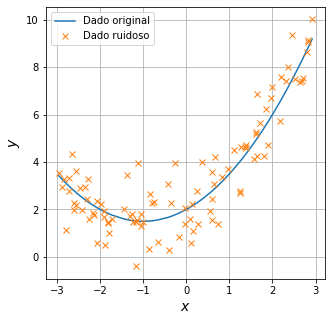

In [18]:
print('a)')
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()

In [19]:
# Polynomial order.
model_order = 90

In [20]:
lambdas = np.linspace(10**-10, 1, 1000)

e)


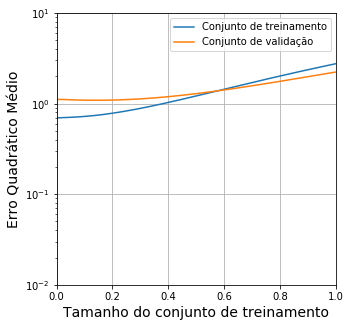

In [21]:
#b), c), d)
include_bias = True

error_training = []
error_test = []

minimum_val_error = float("inf")

fig = plt.figure(figsize=(5,5))

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42)
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_regul = model.predict(x_train)
    y_test_regul = model.predict(x_test)
    error_training.append((mean_squared_error(y_train, y_train_regul)))
    error_test.append((mean_squared_error(y_test, y_test_regul)))
    
    if mean_squared_error(y_test, y_test_regul) < minimum_val_error:
        best_lambda = lambdas[i]
        minimum_val_error = mean_squared_error(y_test, y_test_regul)
        best_model = clone(model, safe=True)
    
print('e)')
plt.plot(lambdas, error_training, label='Conjunto de treinamento')
plt.plot(lambdas, error_test, label='Conjunto de validação')
plt.yscale('log')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
#plt.ylim([1e-1, 12])
plt.axis([1e-12, 1, 1e-2, 10])
plt.legend()
plt.show()

In [22]:
print('f) Baseado no menor valor do erro de validação o valor ótimo para λ é ' + str(best_lambda))

f) Baseado no menor valor do erro de validação o valor ótimo para λ é 0.14114114122702703


g)


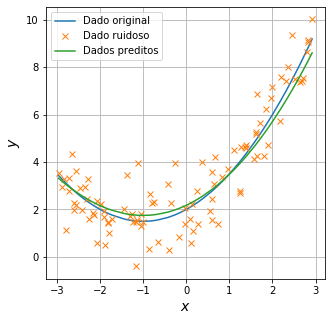

In [23]:
print('g)')
best_model.fit(x, y)
y_prediction = best_model.predict(x)

# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y_prediction, label='Dados preditos')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()

In [24]:
print('h) Pesos obtidos durante o treinamento do modelo: ')
print(best_model.named_steps['reg'].coef_)

h) Pesos obtidos durante o treinamento do modelo: 
[0.         1.52620649 1.17225287 0.07039226 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
